# Sheet8 Leonhard Moske


In [1]:
import numpy as np
import scipy.stats

def metropolis(x,newx, Tx, Txnew):
    rat = (Txnew * scipy.stats.norm(0,1).pdf(newx))/(Tx * scipy.stats.norm(0,1).pdf(x))
    if rat > 1:
        return 1
    else: 
        return rat

def markovStep(x):
    xnew = x
    r = np.random.rand()
    #u = np.random.rand()
    if r < 0.1:
        u = np.random.rand()
        if u < metropolis(x, x +0.1, 0.1, 0.2):
            xnew += 0.1
    r = np.random.rand()
    if r < 0.2:
        u =  np.random.rand()
        if u < metropolis(x, x -0.1, 0.2, 0.1):
            xnew -= 0.1    
    r = np.random.rand()
    if r < 0.4:
        u =  np.random.rand()
        if u < metropolis(x, x +0.01, 0.4, 0.3):
            xnew += 0.01    
    r = np.random.rand()
    if r < 0.3:
        u =  np.random.rand()
        if u < metropolis(x, x -0.01, 0.3, 0.4):
            xnew -= 0.01
    return xnew


In [11]:
import numpy as np
nsample = 30000

xHist = np.empty(nsample)
xHist[0] = 0

for i in range(1,nsample):
    xHist[i] = markovStep(xHist[i-1])


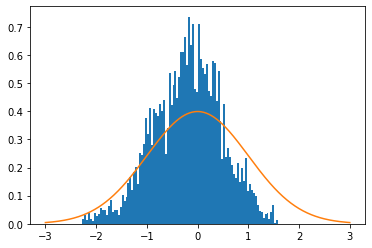

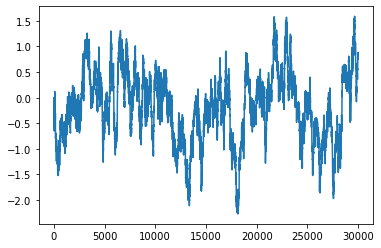

In [12]:

import matplotlib.pyplot as plt

xRagne = np.linspace(-3,3,600)

plt.hist(xHist, bins=100, density=True)
plt.plot(xRagne, scipy.stats.norm(0,1).pdf(xRagne))
plt.show()
plt.plot(xHist)
plt.show()

In [13]:
def binning(xHist, binSize):
    blocked = np.zeros(int(len(xHist)/binSize))
    for i in range(int(len(xHist)/binSize)):
        blocked[i] = np.mean(xHist[i*binSize:i*binSize + binSize])
    return blocked

0.2483914281187839


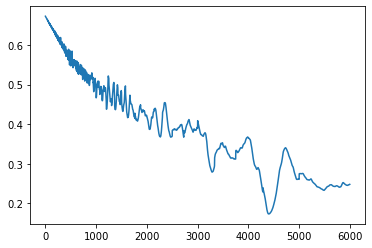

In [25]:
maxbinsize = 6000

blocked = binning(xHist, maxbinsize)
print(np.std(blocked))

errors = []

for i in range(1,maxbinsize):
    errors.append(np.std(binning(xHist, i)))

plt.plot(errors)